#### Setup ambiente di lavoro

In [ ]:
# pip install seaborn
# pip install pandas
# pip install plotly

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

#### Importazione dei dati

In [2]:
data = pd.read_csv('Diabete_dati.csv', sep=';')

#### Esplorazione e Pulizia dei Dati

In [3]:
print(data.head())

    ASL  ANNO    SESSO    ETA  NUMERO
0  Bari  2006  Femmine  40-44     578
1  Bari  2006  Femmine  45-49     962
2  Bari  2006  Femmine  50-54    1715
3  Bari  2006  Femmine  55-59    2839
4  Bari  2006  Femmine  60-64    3679


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ASL     2520 non-null   object
 1   ANNO    2520 non-null   int64 
 2   SESSO   2520 non-null   object
 3   ETA     2520 non-null   object
 4   NUMERO  2520 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 98.6+ KB
None


In [5]:
print(data.isnull().sum())

ASL       0
ANNO      0
SESSO     0
ETA       0
NUMERO    0
dtype: int64


#### Analisi Esplorativa dei Dati

##### Media del Numero di Casi di Diabete per ASL della Puglia nel 2019

In [6]:
df_2019 = data[(data['ANNO'] == 2019) & (data['ASL'].str.contains('Bari|Barletta|Brindisi|Foggia|Lecce|Taranto'))]

data_2019 = df_2019.groupby('ASL', as_index=False)['NUMERO'].mean()

data_2019['NUMERO'] = data_2019['NUMERO'].round(0)

fig = px.bar(data_2019, x='ASL', y='NUMERO',
             title='Media del Numero di Casi di Diabete per ASL della Puglia nel 2019',
             labels={'NUMERO': 'Media del Numero di Casi di Diabete', 'ASL': 'Regione'},
             text='NUMERO',       
             color='NUMERO',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Regione',
    yaxis_title='Media del Numero di Casi di Diabete',
    title_x=0.5,
    template='plotly_white'
)

fig.update_traces(textposition='outside')

fig.show()


##### Distribuzione dei casi di diabete per età e sesso


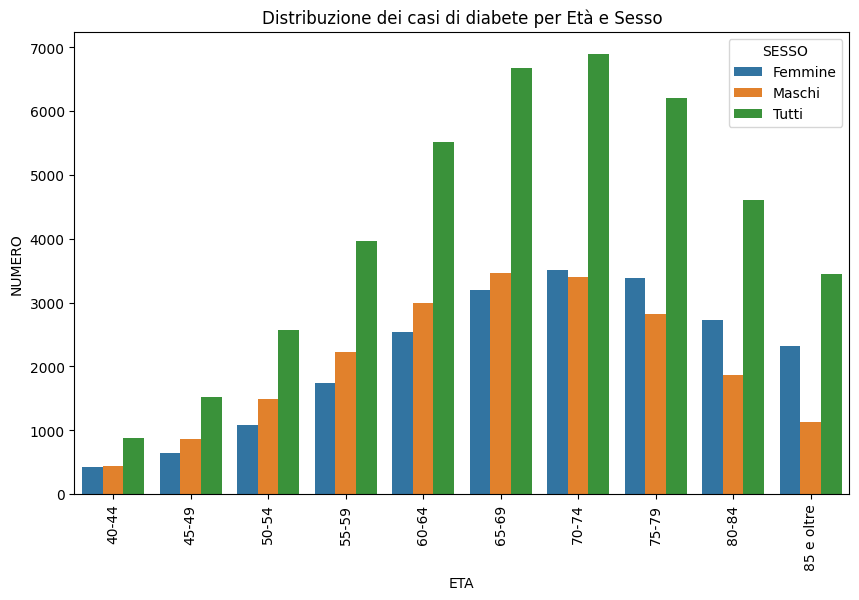

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ETA', y='NUMERO', hue='SESSO', data=data, errorbar=None)
plt.xticks(rotation=90)
plt.title('Distribuzione dei casi di diabete per Età e Sesso')
plt.show()

#### Tendenza del Numero di Casi di Diabete per ASL della Puglia nel Tempo

In [8]:
fig = px.line(data, x='ANNO', y='NUMERO', color='ASL',
              title='Tendenza del Numero di Casi di Diabete per ASL della Puglia nel Tempo',
              labels={'NUMERO': 'Numero di Casi di Diabete', 'ANNO': 'Anno', 'ASL': 'Regione'},
              markers=True)

fig.update_layout(
    xaxis_title='Anno',
    yaxis_title='Numero di Casi di Diabete',
    title_x=0.5,
    template='plotly_white'
)

fig.show()


#### Distribuzione del Numero di Casi di Diabete per Anno e Regione (ASL)

In [9]:
fig = px.box(data, x='ANNO', y='NUMERO', color='ASL',
             title='Distribuzione del Numero di Casi di Diabete per Anno e Regione (ASL)',
             labels={'NUMERO': 'Numero di Casi di Diabete', 'ANNO': 'Anno', 'ASL': 'Regione'})

fig.update_layout(
    xaxis_title='Anno',
    yaxis_title='Numero di Casi di Diabete',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

#### Relazione tra Diabete, Età e Sesso (Grafico a Linee con Area Sottesa)

In [10]:
df = data

columns_to_check = ['ASL', 'ANNO', 'SESSO', 'ETA', 'NUMERO']
for col in columns_to_check:
    df = df[~df[col].astype(str).str.contains('Tutti')]

df['ANNO'] = pd.to_datetime(df['ANNO'], format='%Y')

df_maschi = df[df['SESSO'] == 'Maschi']
df_femmine = df[df['SESSO'] == 'Femmine']

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_maschi['ETA'], y=df_maschi['NUMERO'], mode='lines', fill='tozeroy', 
                         name='Maschi', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=df_femmine['ETA'], y=df_femmine['NUMERO'], mode='lines', fill='tozeroy', 
                         name='Femmine', line=dict(color='turquoise')))

fig.update_layout(
    title='Relazione tra Diabete, Età e Sesso (Grafico a Linee con Area Sottesa)',
    xaxis_title='Età',
    yaxis_title='Numero di Casi di Diabete',
    legend_title='Sesso',
    hovermode='x'
)

fig.show()

In [11]:
import pandas as pd
from tabulate import tabulate

def create_age_group_tables(df):
    def label_eta_group(eta):
        if eta in ['0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']:
            return '<60 anni'
        else:
            return '>60 anni'

    df['Fascie ETA'] = df['ETA'].apply(label_eta_group)

    df_avg_cases = df.groupby(['ASL', 'SESSO', 'Fascie ETA'], as_index=False)['NUMERO'].mean()

    table = pd.pivot_table(df_avg_cases, values='NUMERO', index=['ASL', 'Fascie ETA'], columns='SESSO', aggfunc='mean')

    table = table.fillna(0)

    table_under_60 = table.xs('<60 anni', level='Fascie ETA')
    table_over_60 = table.xs('>60 anni', level='Fascie ETA')

    table_under_60 = table_under_60.round(0)
    table_over_60 = table_over_60.round(0)

    table_under_60_tabulate = tabulate(table_under_60, headers='keys', tablefmt='grid')
    table_over_60_tabulate = tabulate(table_over_60, headers='keys', tablefmt='grid')

    print("Tabella per <60 anni:\n", table_under_60_tabulate)
    print("\nTabella per >60 anni:\n", table_over_60_tabulate)

create_age_group_tables(data)


Tabella per <60 anni:
 +----------+-----------+----------+---------+
| ASL      |   Femmine |   Maschi |   Tutti |
+==========+===========+==========+=========+
| BAT      |       545 |      695 |    1240 |
+----------+-----------+----------+---------+
| Bari     |      1899 |     2418 |    4317 |
+----------+-----------+----------+---------+
| Brindisi |       551 |      737 |    1289 |
+----------+-----------+----------+---------+
| Foggia   |       970 |     1273 |    2244 |
+----------+-----------+----------+---------+
| Lecce    |       975 |     1279 |    2255 |
+----------+-----------+----------+---------+
| Taranto  |       902 |     1133 |    2035 |
+----------+-----------+----------+---------+

Tabella per >60 anni:
 +----------+-----------+----------+---------+
| ASL      |   Femmine |   Maschi |   Tutti |
+==========+===========+==========+=========+
| BAT      |      1470 |     1341 |    2810 |
+----------+-----------+----------+---------+
| Bari     |      5144 |     4916

### Conclusioni

- **ASL più colpite:** Le ASL con il numero più alto di casi di diabete sono Bari e Lecce.
- **Tendenze temporali:** I casi di diabete sono aumentati/diminuiti nel corso degli anni, con un picco nel 2019.
- **Distribuzione per età e sesso:** Le fasce di età più colpite sono dai 65 ai 75 anni, con una prevalenza maggiore di uomini.

### Raccomandazioni

- **Per le Autorità Sanitarie:** Implementare campagne di sensibilizzazione nelle regioni e fasce di età più colpite.
- **Per i Cittadini:** Adottare misure preventive come una dieta equilibrata e l'esercizio fisico regolare.
- **Per i Ricercatori:** Ulteriori studi per comprendere i fattori di rischio specifici in regioni particolarmente colpite.
